In [5]:
from pymongo import MongoClient
import pandas as pd
from datetime import datetime
from datetime import timedelta

In [2]:
def get_historical_data(symbol: str, last_n: int):
    try:
        # Connect to MongoDB
        client = MongoClient("mongodb://127.0.0.1:27017/")
        db = client["stockdata"]
        collection = db[symbol]

        # Retrieve the last N documents for the given symbol
        cursor = collection.find().sort("_id", -1).limit(last_n)
        data_list = list(cursor)

        # Convert the selected documents into a DataFrame
        df = pd.DataFrame(data_list)

        return df

    finally:
        # Close the MongoDB connection
        client.close()

In [3]:
df = get_historical_data('TURSG.IS',50)

In [4]:
df.head()

,_id,Open,High,Low,Close,Adj Close,Volume
0,2024-02-28,48.000000,48.540001,47.020000,47.900002,47.900002,1650077
1,2024-02-27,49.639999,49.680000,47.840000,47.919998,47.919998,2800885
2,2024-02-26,50.349998,50.799999,49.580002,49.580002,49.580002,2175003
3,2024-02-23,50.650002,51.250000,49.000000,50.349998,50.349998,5101495
4,2024-02-22,51.549999,52.200001,50.250000,50.549999,50.549999,4381130


In [12]:
import matplotlib.pyplot as plt

def plot_stock(symbol, last_n):
    try:
        client = MongoClient("mongodb://127.0.0.1:27017/")
        db = client["stockdata"]
        collection = db[symbol]

        cursor = collection.find().sort("_id", -1).limit(last_n)
        data_list = list(cursor)

        df = pd.DataFrame(data_list)

        df["_id"] = pd.to_datetime(df["_id"]) 

        plt.figure(figsize=(10, 6))

        plt.plot(df["_id"], df["Open"], label="Open")
        plt.plot(df["_id"], df["High"], label="High")
        plt.plot(df["_id"], df["Low"], label="Low")
        plt.plot(df["_id"], df["Close"], label="Close")

        plt.title(f"Stock Price Over Time {symbol}")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.grid(True)
        plt.show()

    finally:
        client.close()

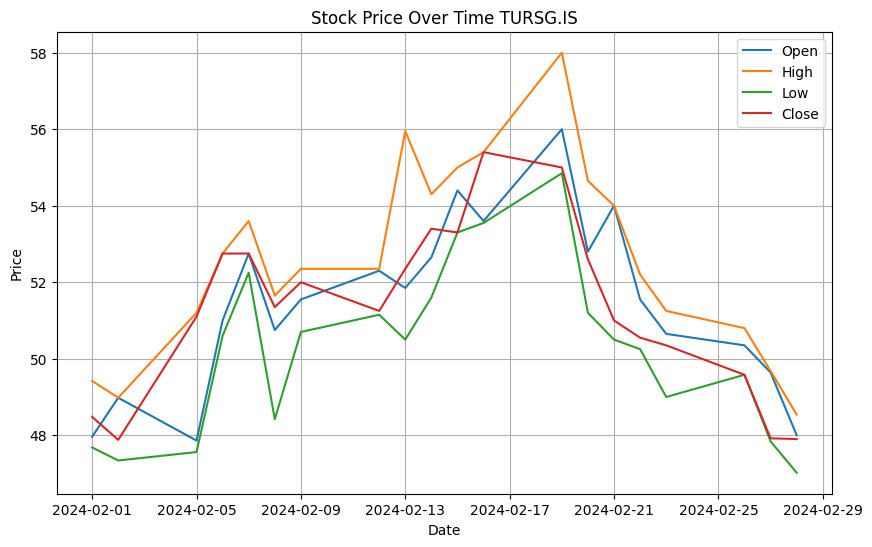

In [15]:
plot_stock('TURSG.IS',20)